<a href="https://colab.research.google.com/github/gabriellycristine1/Projetos_e_Atividades_Python/blob/main/Naive_Bayes_wine_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANDO BIBLIOTECAS

In [ ]:
from sklearn.svm import SVC
import pickle 
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

IMPORTANDO DATASET PARA INICIAR A ANALISE E TRATAMENTOD DE DADOS

In [ ]:
dados = pd.read_csv('/content/winequality-red.csv',sep=';')
dados

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


VERIFICANDO SE HÁ DADOS NULOS

In [ ]:
dados.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

CRIANDO GRAFICO PARA ANALISAR SE HÁ DADOS DISCREPANTES

In [ ]:
grafico = px.scatter_matrix(dados, dimensions = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])
grafico

ANALISANDO INDIVIDUALMENTE OS QUE MAIS PARENCIAM TER DADOS ESTRANHOS

In [ ]:
grafico = px.scatter_matrix(dados, dimensions = ['sulphates'])
grafico

In [ ]:
grafico = px.scatter_matrix(dados, dimensions = ['total sulfur dioxide'])
grafico

In [ ]:
grafico = px.scatter_matrix(dados, dimensions = ['citric acid'])
grafico

TRATANDO DADOS CRIANDO FILTROS E SUBSTITUINDO OS DADOS DISCREPANTES PELA MEDIA DA COLUNA ONDE ESSE DADO SE LOCALIZA

In [ ]:
selecao = dados.loc[dados['total sulfur dioxide']>165]
selecao['total sulfur dioxide'] = 46.46779237023139
selecao1 = dados.loc[dados['chlorides'] > 0.422]
selecao1['chlorides'] = 0.087467
selecao2 = dados.loc[dados['citric acid'] > 0.79]
selecao2['citric acid'] = 0.270976
selecao3 = dados.loc[dados['sulphates'] > 1.62]
selecao3['sulphates'] = 0.658149

SUBSITUINDO ESSES VALORES NO DATASET

In [ ]:
dados.loc[dados['total sulfur dioxide'] > 165] = selecao
dados.loc[dados['chlorides']> 0.422] = selecao1
dados.loc[dados['citric acid'] > 0.79] = selecao2
dados.iloc[dados['sulphates']>1.62] = selecao3

In [ ]:
grafico = px.scatter_matrix(dados, dimensions = ['sulphates'])
grafico

In [ ]:
grafico = px.scatter_matrix(dados, dimensions = ['total sulfur dioxide'])
grafico

In [ ]:
grafico = px.scatter_matrix(dados, dimensions = ['chlorides'])
grafico

In [ ]:
grafico = px.scatter_matrix(dados, dimensions = ['citric acid'])
grafico

In [ ]:
grafico = px.scatter_matrix(dados, dimensions = [ 'citric acid','chlorides','total sulfur dioxide'])
grafico

SEPARANDO PREVISOR E CLASSIFICADOR
- PREVISOR = X_dados
- CLASSIFICADOR = y_dados

In [ ]:
X_dados = dados.iloc[:,0:11].values
X_dados

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [ ]:
y_dados = dados.iloc[:,11].values
y_dados

array([5, 5, 5, ..., 6, 5, 6])

ESCALONANDO OS VALORES

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler_dados = StandardScaler()
X_dados = scaler_dados.fit_transform(X_dados)

In [ ]:
from sklearn.model_selection import train_test_split

CRIANDO AMBIENTE DE TREINAMENTO, SEPARANDO ENTRE TREINO E TESTE.

In [ ]:
X_dados_treinamento, X_dados_teste, Y_dados_treinamento, Y_dados_teste = train_test_split(X_dados, y_dados, test_size = 0.25, random_state = 0)

In [ ]:
X_dados_treinamento.shape

(1199, 11)

In [ ]:
Y_dados_treinamento

array([5, 5, 5, ..., 6, 6, 5])

CRIANDO ARQUIVO PKL COM OS DADOS JA SEPARADOS ENTRE TESTE E TREINAMENTO

In [ ]:
with open('/content/winequality-red.pkl',mode='wb') as f:
  pickle.dump([X_dados_treinamento,Y_dados_treinamento, X_dados_teste, Y_dados_teste],f)

CRIANDO IA ULTILIZANDO O MODELO DE SVM 

In [ ]:
svm_vinho = SVC(kernel='linear',random_state=1, C = 1.0)
svm_vinho.fit(X_dados_treinamento, Y_dados_treinamento)

SVC(kernel='linear', random_state=1)

CRIANDO O PREVISOR TESTE DE SVM:

In [ ]:
previsores = svm_vinho.predict(X_dados_teste)
previsores

array([6, 5, 7, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 7, 6, 6, 5, 7, 5,
       6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 7, 6, 5, 6, 7, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6, 5, 6, 7, 5, 5, 6, 7, 5, 5,
       6, 6, 7, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 7, 6, 6,
       7, 7, 6, 5, 5, 7, 5, 6, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5,
       5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 7, 6, 5, 7, 6, 6, 6, 5,
       5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6,

CRIANDO IA ULTILIZANDO NAIVE BAYES:

In [ ]:
naive_dados = GaussianNB()

TREINAMENTO:

In [ ]:
naive_dados.fit(X_dados_treinamento,Y_dados_treinamento)

GaussianNB()

CRIANDO PREVISOR TESTE:

In [ ]:
previsor = naive_dados.predict(X_dados_teste)
previsor

array([6, 5, 7, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6, 4, 6, 7, 7, 6, 6, 5, 6, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 7, 6, 5, 5, 6, 7, 5, 6, 7, 6, 5, 6, 8, 7,
       6, 5, 5, 6, 6, 6, 5, 6, 6, 7, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 7, 6, 6, 5, 4, 5, 5, 5, 6, 5, 5, 5, 7, 6, 5, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 7, 5, 7, 6, 5, 6, 7, 7, 6, 7, 6, 5, 6, 5, 6, 5,
       6, 5, 7, 5, 6, 5, 5, 7, 6, 6, 5, 6, 4, 5, 6, 7, 5, 5, 7, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 7, 5, 6, 5, 5, 5, 5, 6, 7, 7, 7, 5, 6, 7, 5, 5,
       5, 5, 6, 5, 6, 6, 6, 6, 7, 5, 7, 5, 6, 7, 5, 6, 6, 5, 5, 7, 6, 7,
       6, 8, 6, 5, 5, 8, 5, 7, 8, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 7, 7, 5, 6, 5, 4, 7, 5, 5, 6, 7, 5, 5,
       5, 6, 7, 6, 5, 6, 7, 6, 5, 5, 5, 6, 3, 6, 7, 6, 7, 7, 8, 7, 5, 4,
       5, 5, 6, 5, 5, 5, 4, 7, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 8, 5, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 7, 5, 7, 7, 5, 7, 6, 7, 6, 5,
       6, 5, 7, 6, 5, 4, 6, 5, 5, 6, 5, 6, 5, 5, 6,

A IA CRIADA ULTIZANDO O MODELO DE NAIVE BAYES ALCANÇOU UMA PRECISÃO DE 54,75%

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_dados_teste, previsor)

0.5475

A IA CRIADA ULTIZANDO O MODELO DE SVM ALCANÇOU UMA PRECISÃO DE 61,25%

In [ ]:
accuracy_score(Y_dados_teste,previsores)

0.6125

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.5475

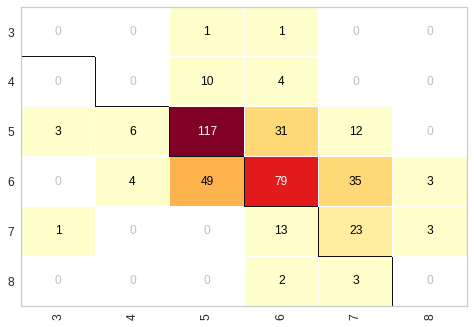

In [ ]:
cm = ConfusionMatrix(naive_dados)
cm.fit(X_dados_teste, Y_dados_teste)
cm.score(X_dados_teste, Y_dados_teste)

TESTANDO MODELO ATRAVES DOS INPUTS, INSERINDO DADOS DO PROPRIO DATASET E OBTENDO UMA RESPOSTA CORRETA!

In [ ]:
FA = input('insira sua acidez fixa: ')
AV = input('insira a acidez volatil: ')
AC = input('insira a acidez citrica: ')
RS = input('insira o açucar residual: ')
CD = input('insira o valor do cloridrico: ')
FSD = input('insira o valor de dioxido de sulfurico livre: ')
TSD = input('insira o valor de dioxido de sulfurico total: ')
DT = input('insira o valor da densidade: ')
pH = input('insira o valor do pH: ')
SPT = input('insira o valor do sulfato: ')
ALC = input('insira o valor do alcool: ')

previsor = naive_dados.predict([[FA,AV,AC,RS,CD,FSD,TSD,DT,pH,SPT,ALC]])
previsor

insira sua acidez fixa: 7.4
insira a acidez volatil: 0.700
insira a acidez citrica: 0.00
insira o açucar residual: 1.9
insira o valor do cloridrico: 0.076
insira o valor de dioxido de sulfurico livre: 11.0
insira o valor de dioxido de sulfurico total: 34.0
insira o valor da densidade: 0.99780
insira o valor do pH: 3.51
insira o valor do sulfato: 0.56
insira o valor do alcool: 9.4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



array([5])